In [ ]:
!pip install nltk
!pip install wordcloud
!pip install gensim
!pip install spacy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
ERROR: Operation cancelled by user
^C


In [ ]:
import pandas as pd
import nltk
import matplotlib
import seaborn
import sklearn

print("✅ All major libraries are now ready to use!")

✅ All major libraries are now ready to use!


In [ ]:
import zipfile
import os

zip_path = "test.ft.txt.bz2.zip"  # This is the file you uploaded
extract_folder = "data_folder"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

os.listdir(extract_folder)  # Show contents inside the folder


FileNotFoundError: [Errno 2] No such file or directory: 'test.ft.txt.bz2.zip'

In [ ]:
import os

# List all files in current folder
os.listdir()


['.config', 'sample_data']

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.ft.txt.bz2.zip to test.ft.txt.bz2.zip


In [ ]:
import os
os.listdir()

['.config', 'test.ft.txt.bz2.zip', 'sample_data']

In [ ]:
import zipfile

zip_path = "test.ft.txt.bz2.zip"  # Jo bhi file upload hui hai
extract_folder = "data_folder"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

os.listdir(extract_folder)


['test.ft.txt.bz2']

In [ ]:
import bz2

bz2_file_path = "data_folder/test.ft.txt.bz2"
txt_output_path = "amazon_reviews.txt"  # Yeh naya text file banega

with bz2.open(bz2_file_path, "rt", encoding="utf-8") as bz_file:
    with open(txt_output_path, "w", encoding="utf-8") as out_file:
        out_file.write(bz_file.read())

print("✅ Extracted bz2 to text file successfully.")


✅ Extracted bz2 to text file successfully.


In [ ]:
with open(txt_output_path, "r", encoding="utf-8") as f:
    for _ in range(5):
        print(f.readline())


__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"

__label__2 One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of t

In [ ]:
import pandas as pd

data = []
with open(txt_output_path, "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():
            parts = line.strip().split(" ", 1)
            if len(parts) == 2:
                label, text = parts
                rating = int(label[-1])  # e.g., '5' from '__label__5'
                data.append((rating, text))

df = pd.DataFrame(data, columns=["Rating", "Review"])
df.head()


,Rating,Review
0,2,Great CD: My lovely Pat has one of the GREAT v...
1,2,One of the best game music soundtracks - for a...
2,1,Batteries died within a year ...: I bought thi...
3,2,"works fine, but Maha Energy is better: Check o..."
4,2,Great for the non-audiophile: Reviewed quite a...


In [ ]:
df.info()
df['Rating'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  400000 non-null  int64 
 1   Review  400000 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


,count
Rating,
2,200000
1,200000


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Remove special characters, digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # 3. Tokenize
    words = text.split()
    # 4. Remove stopwords + lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)


In [ ]:
df_small = df.sample(n=10000, random_state=42).copy()  # 10,000 reviews sample
df_small['Cleaned_Review'] = df_small['Review'].apply(clean_text)
df_small[['Rating', 'Cleaned_Review']].head()


,Rating,Cleaned_Review
23218,2,great book must preface saying religious loved...
20731,1,huge disappointment big time long term trevani...
39555,2,wayne tight cant hang turk album hot want howe...
147506,2,excellent read book elementary school probably...
314215,1,anusara although book touted several anusara w...


In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt


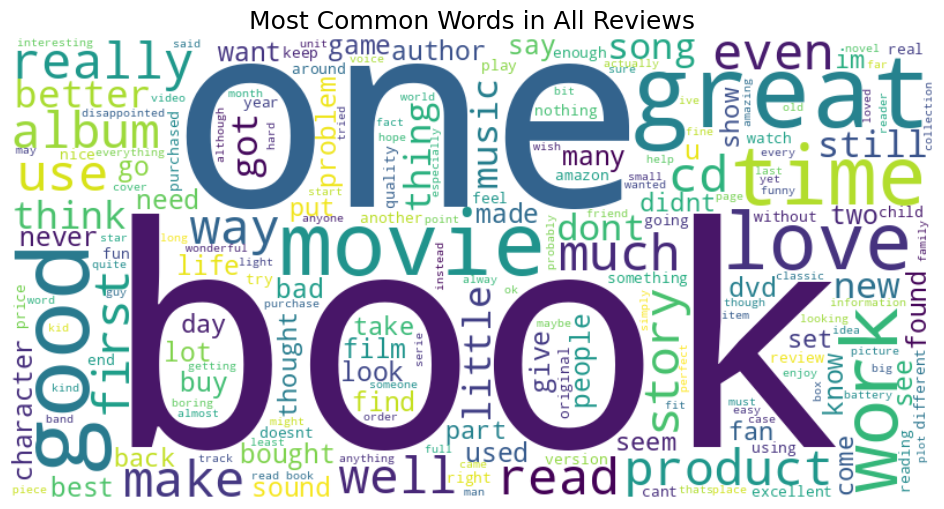

In [ ]:
all_words = ' '.join(df_small['Cleaned_Review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in All Reviews', fontsize=18)
plt.show()


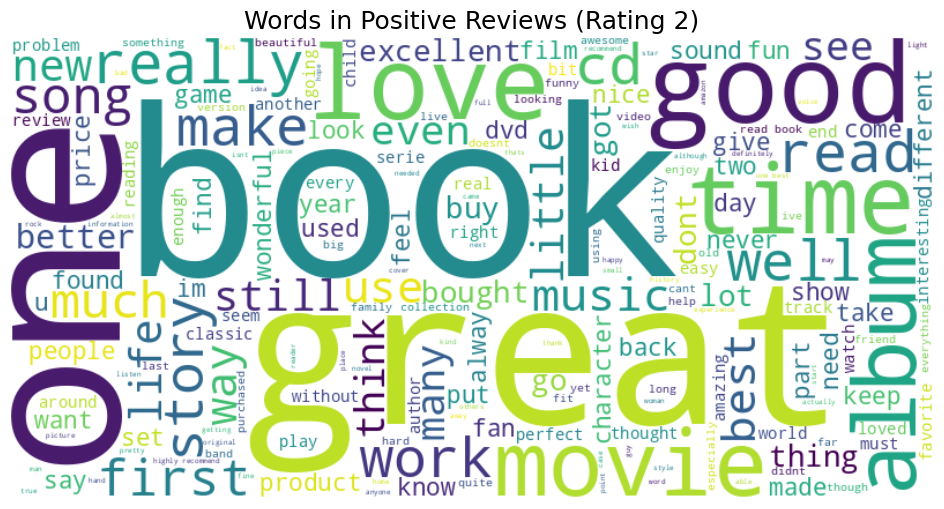

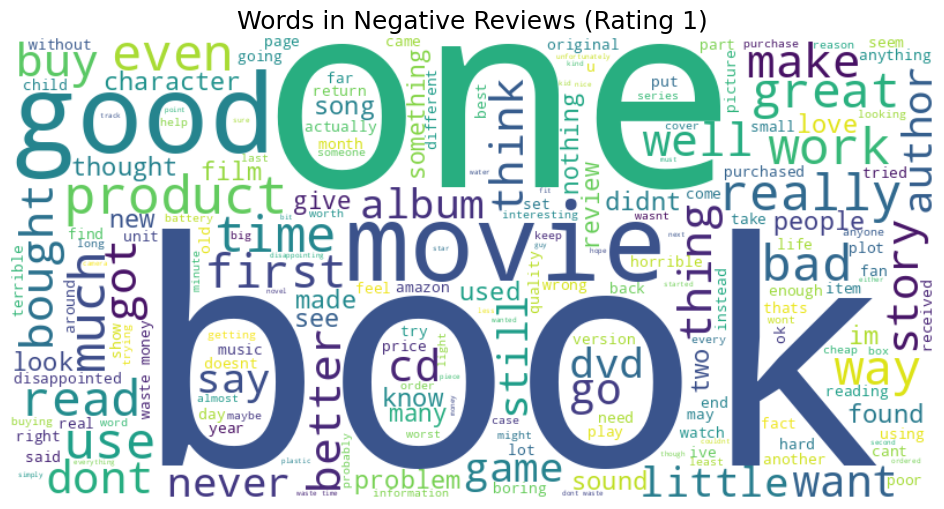

In [ ]:
positive_reviews = ' '.join(df_small[df_small['Rating'] == 2]['Cleaned_Review'])
negative_reviews = ' '.join(df_small[df_small['Rating'] == 1]['Cleaned_Review'])

# Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Positive Reviews (Rating 2)', fontsize=18)
plt.show()

# Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Words in Negative Reviews (Rating 1)', fontsize=18)
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X2 = vectorizer.fit_transform(df_small['Cleaned_Review'])

sum_words = X2.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Show top 10 bigrams
for bigram, freq in words_freq[:10]:
    print(f"{bigram}: {freq}")


read book: 311
waste money: 229
year old: 228
highly recommend: 171
dont know: 164
book read: 158
waste time: 151
dont waste: 151
year ago: 139
great book: 137


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize cleaned reviews
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = tfidf.fit_transform(df_small['Cleaned_Review'])

print("✅ TF-IDF matrix shape:", X.shape)


✅ TF-IDF matrix shape: (10000, 5000)


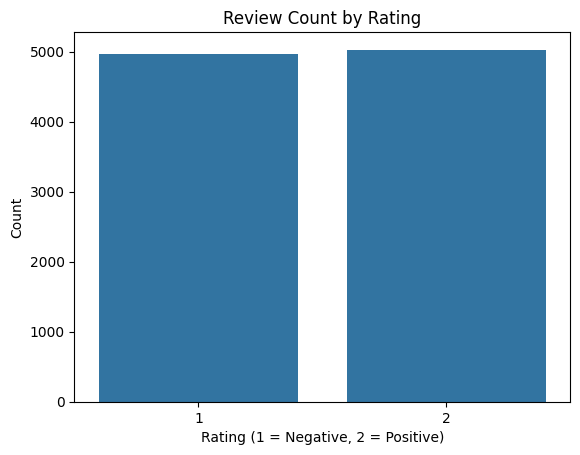

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Rating', data=df_small)
plt.title("Review Count by Rating")
plt.xlabel("Rating (1 = Negative, 2 = Positive)")
plt.ylabel("Count")
plt.show()


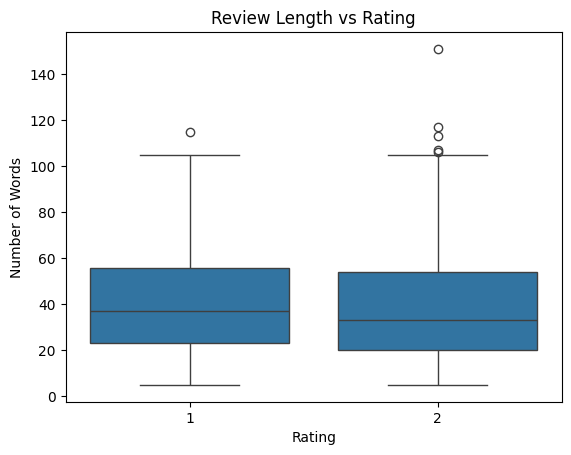

In [ ]:
# Add new column: word count
df_small['Review_Length'] = df_small['Cleaned_Review'].apply(lambda x: len(x.split()))

# Plot length distribution by rating
sns.boxplot(x='Rating', y='Review_Length', data=df_small)
plt.title("Review Length vs Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Words")
plt.show()


In [ ]:
from collections import Counter

# Rating 1
neg_words = ' '.join(df_small[df_small['Rating'] == 1]['Cleaned_Review']).split()
neg_top = Counter(neg_words).most_common(10)
print("🔴 Top words in negative reviews:\n", neg_top)

# Rating 2
pos_words = ' '.join(df_small[df_small['Rating'] == 2]['Cleaned_Review']).split()
pos_top = Counter(pos_words).most_common(10)
print("🟢 Top words in positive reviews:\n", pos_top)


🔴 Top words in negative reviews:
 [('book', 2950), ('one', 1985), ('like', 1520), ('would', 1499), ('get', 1197), ('good', 1194), ('dont', 1160), ('time', 1124), ('movie', 1003), ('work', 874)]
🟢 Top words in positive reviews:
 [('book', 3116), ('great', 2352), ('one', 1917), ('good', 1607), ('like', 1369), ('love', 1142), ('read', 1108), ('time', 1067), ('get', 942), ('well', 938)]


In [ ]:
y = df_small['Rating']  # This is the label column (1 or 2)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Results:
Accuracy: 0.8615
[[842 129]
 [148 881]]
              precision    recall  f1-score   support

           1       0.85      0.87      0.86       971
           2       0.87      0.86      0.86      1029

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("🔹 Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


🔹 Naive Bayes Results:
Accuracy: 0.8365
[[811 160]
 [167 862]]
              precision    recall  f1-score   support

           1       0.83      0.84      0.83       971
           2       0.84      0.84      0.84      1029

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("🔹 SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


🔹 SVM Results:
Accuracy: 0.844
[[808 163]
 [149 880]]
              precision    recall  f1-score   support

           1       0.84      0.83      0.84       971
           2       0.84      0.86      0.85      1029

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



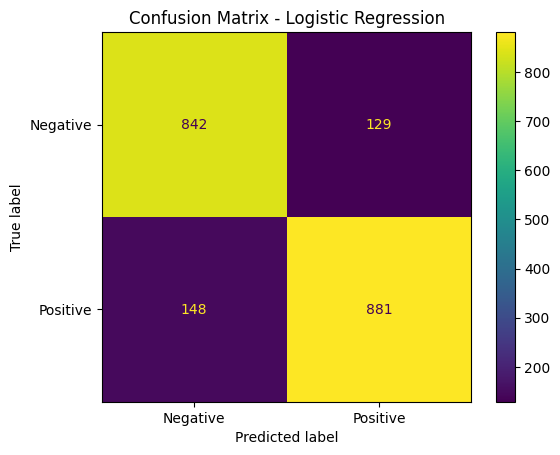

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, display_labels=["Negative", "Positive"])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
!pip install gensim pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 66.3 MB/s eta 0:00:00


In [ ]:
import gensim
from gensim import corpora
import pyLDAvis.gensim_models
import pyLDAvis

from pprint import pprint


In [ ]:
# Tokenize the cleaned reviews
texts = [review.split() for review in df_small['Cleaned_Review']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [ ]:
# Train the LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,       # you can increase to 10 or 15 later
    random_state=42,
    passes=10,
    per_word_topics=True
)

# Display the topics
pprint(lda_model.print_topics())


[(0,
  '0.016*"cd" + 0.014*"album" + 0.013*"song" + 0.011*"one" + 0.011*"like" + '
  '0.010*"music" + 0.010*"great" + 0.009*"sound" + 0.007*"good" + '
  '0.006*"best"'),
 (1,
  '0.021*"game" + 0.005*"book" + 0.004*"history" + 0.003*"life" + 0.003*"god" '
  '+ 0.003*"world" + 0.002*"study" + 0.002*"american" + 0.002*"bible" + '
  '0.002*"work"'),
 (2,
  '0.010*"one" + 0.009*"product" + 0.008*"work" + 0.007*"buy" + 0.007*"get" + '
  '0.007*"would" + 0.006*"time" + 0.006*"bought" + 0.006*"dont" + 0.005*"use"'),
 (3,
  '0.012*"great" + 0.009*"product" + 0.008*"use" + 0.008*"would" + 0.008*"one" '
  '+ 0.007*"work" + 0.006*"good" + 0.006*"like" + 0.006*"well" + 0.005*"easy"'),
 (4,
  '0.034*"book" + 0.011*"movie" + 0.011*"read" + 0.010*"one" + 0.008*"good" + '
  '0.008*"like" + 0.006*"would" + 0.006*"great" + 0.006*"story" + '
  '0.006*"time"')]


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.028981  0.102550       1        1  41.432688
3     -0.123002 -0.086710       2        1  19.086554
0     -0.035243  0.147896       3        1  17.405756
2     -0.118616 -0.112134       4        1  15.943874
1      0.305841 -0.051602       5        1   6.131128, topic_info=           Term         Freq        Total Category  logprob  loglift
3          book  5736.000000  5736.000000  Default  30.0000  30.0000
1159         cd  1115.000000  1115.000000  Default  29.0000  29.0000
77        album   979.000000   979.000000  Default  28.0000  28.0000
1169       song   934.000000   934.000000  Default  27.0000  27.0000
368        game   626.000000   626.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
355        many    47.465808   810.126743   Topic5  -6.2454  -0.0454
327        play    42.434468   425.950751   Topic5  -6.3574   0.4854
47       author    41.857268   551.934239   Topic5  -6.3711   0.2126
98    excellent    41.009131   459.621055   Topic5  -6.3916   0.3752
2          best    41.329994  1056.166293   Topic5  -6.3838  -0.4490

[391 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
5586      5  0.946513  academic
1888      1  0.996184    acting
981       1  0.992459    action
3253      1  0.997723     actor
5039      2  0.992557   adapter
...     ...       ...       ...
299       1  0.394753      year
299       2  0.192991      year
299       3  0.130707      year
299       4  0.276327      year
299       5  0.005263      year

[720 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 3, 2])

In [ ]:
import pandas as pd

# Simulate a timeline by assuming one review per hour starting from Jan 1, 2022
df_small['timestamp'] = pd.date_range(start='2022-01-01', periods=len(df_small), freq='H')

# Optional: Set as index
df_small.set_index('timestamp', inplace=True)


/tmp/ipython-input-36-3481989329.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_small['timestamp'] = pd.date_range(start='2022-01-01', periods=len(df_small), freq='H')


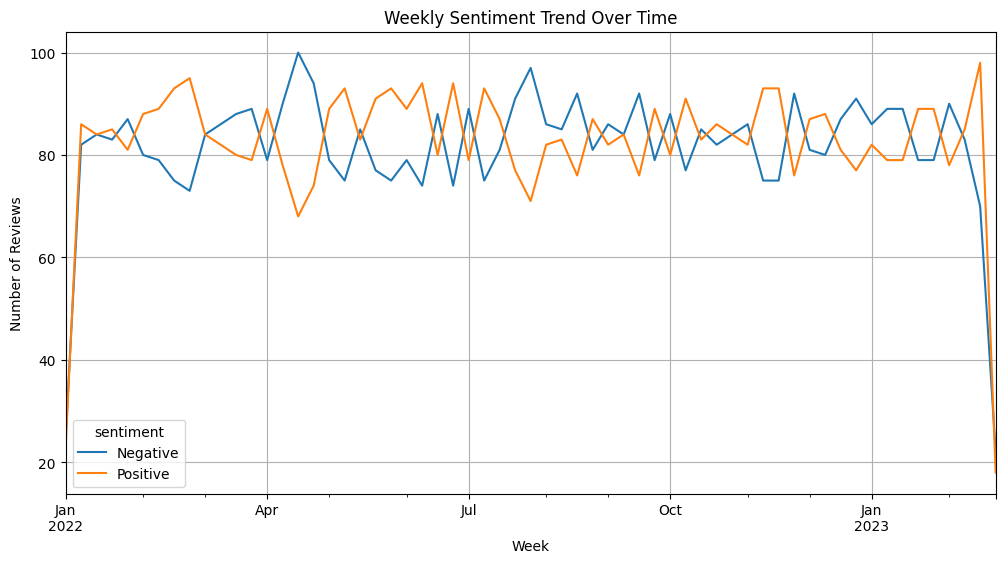

In [ ]:
# Convert ratings to sentiment label
df_small['sentiment'] = df_small['Rating'].map({1: 'Negative', 2: 'Positive'})

# Group by time and sentiment
sentiment_trend = df_small.resample('W').sentiment.value_counts().unstack().fillna(0)

# Plot
import matplotlib.pyplot as plt

sentiment_trend.plot(figsize=(12,6))
plt.title("Weekly Sentiment Trend Over Time")
plt.xlabel("Week")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()


In [ ]:
# Find week with max negative reviews
max_neg_week = sentiment_trend['Negative'].idxmax()
max_neg_value = sentiment_trend['Negative'].max()

print(f"📍 Max negative reviews in week: {max_neg_week.date()} = {int(max_neg_value)} reviews")


📍 Max negative reviews in week: 2022-04-17 = 100 reviews


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1

/usr/local/lib/python3.11/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  import scipy.sparse as _sparse
^C


In [ ]:
import spacy

# Load English NLP model
nlp = spacy.load("en_core_web_sm")


/usr/local/lib/python3.11/dist-packages/cupyx/scipy/sparse/_base.py:10: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  import scipy.sparse as _sparse


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

sample = df_small['Review'].iloc[500]
doc = nlp(sample)

for ent in doc.ents:
    print(f"{ent.text} — {ent.label_}")


NameError: name 'df_small' is not defined

In [ ]:
import zipfile

zip_path = "/content/test.ft.txt.bz2.zip"  # Update path if needed
extract_folder = "data_folder"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


In [ ]:
import bz2
import pandas as pd

# Extract and decode
data = []
with bz2.open("data_folder/test.ft.txt.bz2", 'rt', encoding='utf-8') as file:
    for line in file:
        data.append(line.strip())

# Label and text separation
ratings = [int(line[9]) for line in data]
reviews = [line[10:] for line in data]

# DataFrame
df = pd.DataFrame({'Rating': ratings, 'Review': reviews})
df_small = df.sample(10000, random_state=42).reset_index(drop=True)  # Sample 10k

# Clean reviews
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df_small['Cleaned_Review'] = df_small['Review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

sample = df_small['Review'].iloc[500]
doc = nlp(sample)

for ent in doc.ents:
    print(f"{ent.text} — {ent.label_}")


USA — GPE
third — ORDINAL
first — ORDINAL
about 8 years ago — DATE
USA — GPE


In [ ]:
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Extract from first 1000 reviews (faster)
df_small['Entities'] = df_small['Review'].head(1000).apply(extract_entities)

# View few rows
df_small[['Review', 'Entities']].head(10)


,Review,Entities
0,This is a great book: I must preface this by ...,"[(Dinah, GPE), (Jacob, PERSON), (one, CARDINAL)]"
1,"Huge Disappointment.: As a big time, long ter...","[(Trevanian, NORP), (Trev, WORK_OF_ART), (Jane..."
2,Wayne is tight but cant hang with Turk.: This...,"[(Wayne, PERSON), (Turk, PERSON), (Turks Young..."
3,Excellent: I read this book when I was in ele...,"[(fourth, ORDINAL)]"
4,Not about Anusara: Although this book is tout...,"[(Anusara, GPE), (Anusara, PRODUCT), (the next..."
5,Worst DVD Ever purchased: This was the very w...,"[(Fisher, ORG), (Amazon, ORG), ($$$, MONEY), (..."
6,"Not the strongest fan, but gets the job done....","[(80, MONEY)]"
7,Bottom of the casebook barrel: At the beginni...,"[(a couple months, DATE), (second, ORDINAL), (..."
8,"Hilarious!: This movie is very sweet, I love ...","[(Joy, PERSON), (Ya fed, PERSON)]"
9,"The swinging, sadly, occurs only in the title...","[(Jason, PERSON)]"


In [ ]:
from collections import Counter

# Combine all cleaned reviews by sentiment
pos_reviews = df_small[df_small['Rating'] == 2]['Cleaned_Review']
neg_reviews = df_small[df_small['Rating'] == 1]['Cleaned_Review']

# Join and split words
pos_words = " ".join(pos_reviews).split()
neg_words = " ".join(neg_reviews).split()

# Count common words
common_pos = Counter(pos_words).most_common(15)
common_neg = Counter(neg_words).most_common(15)

print("❤️ Loved Features:")
print(common_pos)

print("\n👎 Criticized Features:")
print(common_neg)


❤️ Loved Features:
[('book', 2715), ('great', 2348), ('one', 1808), ('good', 1604), ('like', 1323), ('read', 1085), ('love', 983), ('well', 935), ('would', 921), ('best', 850), ('time', 841), ('get', 800), ('movie', 786), ('really', 772), ('first', 689)]

👎 Criticized Features:
[('book', 2587), ('one', 1880), ('like', 1512), ('would', 1499), ('good', 1188), ('dont', 1160), ('get', 1075), ('time', 918), ('movie', 864), ('even', 863), ('much', 780), ('read', 774), ('buy', 769), ('really', 745), ('product', 735)]


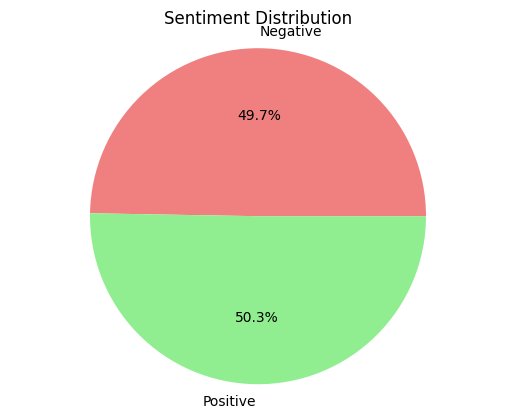

In [ ]:
import matplotlib.pyplot as plt

labels = ['Negative', 'Positive']
sizes = df_small['Rating'].value_counts().sort_index()
colors = ['lightcoral', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


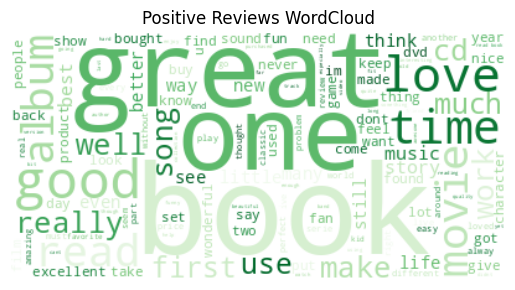

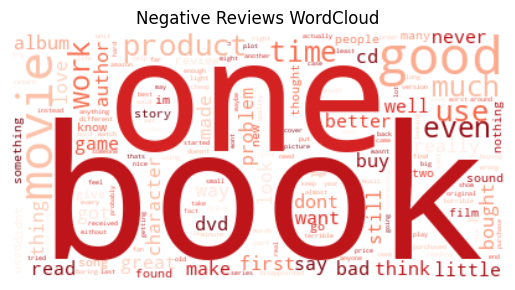

In [ ]:
from wordcloud import WordCloud

pos_text = " ".join(pos_reviews)
neg_text = " ".join(neg_reviews)

# Positive
wc_pos = WordCloud(background_color='white', colormap='Greens').generate(pos_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")
plt.show()

# Negative
wc_neg = WordCloud(background_color='white', colormap='Reds').generate(neg_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()


In [ ]:
sentiment_trend.plot(figsize=(12, 6), linewidth=2)
plt.title("Weekly Review Sentiment Trend")
plt.xlabel("Week")
plt.ylabel("Review Count")
plt.grid(True)
plt.show()


NameError: name 'sentiment_trend' is not defined

In [ ]:
import pandas as pd

df_small['timestamp'] = pd.date_range(start='2022-01-01', periods=len(df_small), freq='h')
df_small.set_index('timestamp', inplace=True)


In [ ]:
df_small['sentiment'] = df_small['Rating'].map({1: 'Negative', 2: 'Positive'})


In [ ]:
sentiment_trend = df_small.resample('W').sentiment.value_counts().unstack().fillna(0)


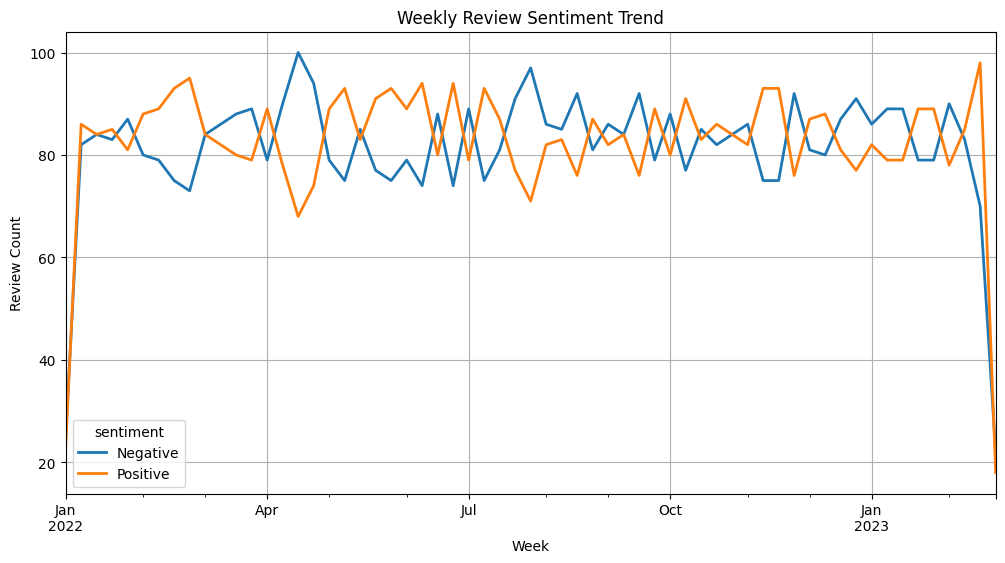

In [ ]:
import matplotlib.pyplot as plt

sentiment_trend.plot(figsize=(12, 6), linewidth=2)
plt.title("Weekly Review Sentiment Trend")
plt.xlabel("Week")
plt.ylabel("Review Count")
plt.grid(True)
plt.show()


In [ ]:
!pip install plotly

import plotly.express as px

fig = px.line(sentiment_trend, title="Weekly Sentiment Trend")
fig.show()


In [1]:
!sudo apt-get install git -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.14).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
!git config --global user.name "AbhimanyuSingh880"
!git config --global user.email "singhabhimanyu41922@gmail.com"

In [3]:
!git clone https://github.com/AbhimanyuSingh880/IBI_Internship.git

Cloning into 'IBI_Internship'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [5]:
!ls


IBI_Internship	sample_data
